<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Predictions05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

 - criando um dataset para treinar a nn

In [24]:
class LinearRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):              #inicializador/construtor de instancias
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)  #função linear com pesos(w) e bias(b) aleatórios

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [25]:
def get_params(w_, b_):
  return w_[0][0].item(), b_[0].item()

In [26]:
def plot_fit(w_, b_, xs, ys):

  # obter parametors numericos w1 e b1 dos tensores w e b
  w1, b1 = get_params(w_, b_)
  # gerar array com dados de -30 a 30 para valores de x e assim plotar a função
  x_ = np.array([-30, 30])
  # calcular valores preditos de y (no array y_) para poder plotar a função
  y_ = w1 * x_ + b1

  plt.ylabel('Y',c="blue")
  plt.xlabel('X', c="blue")
  # desenhando nuvem de pontos
  plt.scatter(xs.numpy(), ys.numpy(), marker='o', c="blue")

  # plotar a reta, com base nos pontos gerados (preditos)
  plt.plot(x_, y_, 'r')
  plt.show()

In [27]:
x = 10 * torch.randn(100, 1)    # criando tensor com 100 linhas e 1 coluna de
                                # valores normalmente distribuidos entrados em 0
                                # com pequena variância. Multiplicados por 10 tem-se
                                # um melhor espaçamento entre eles (visualização)
y = x + (3 * torch.randn(x.size()))

In [28]:
  torch.manual_seed(1)
  model1 = LinearRegression(1, 1)     # criando um objeto model1
  #print(list(model1.parameters()))    # imprimindo seus parametros em forma de lista para melhor visualização

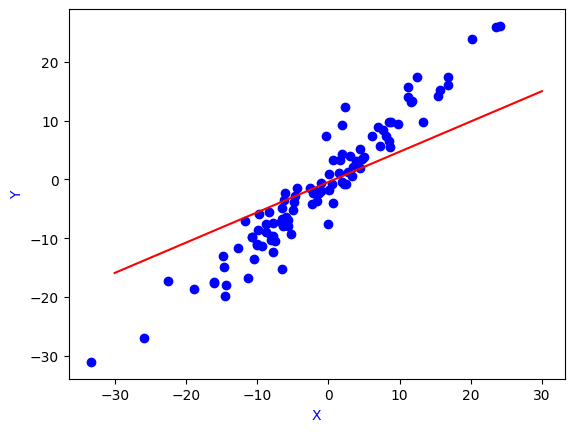

In [29]:
[w, b] = model1.parameters()
plot_fit(w, b, x, y)

- Utilizando o método do gradiente descendente

   O método do gradiente descendente consiste em modificar o peso (w = peso = coeficiente angular da reta, ou do modelo, em uso) de forma que o erro quadrático diminua. Visto que o gradiente de uma função indica o seu sentido de crescimento no campo escalar em que se encontra, ***-f'(W) indicará portanto seu decrescimento.*** Assim sendo, tem-se o método do gradiente descendente como um método iterativo de ajuste do valor de ***w*** com base no gradiente da função Loss, ou erro quadrático.

In [30]:
epochs = 100
losses = []
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001)
for i in range(epochs):
  loss_ = loss(model1.forward(x), y)
  optimizer.zero_grad()
  loss_.backward()
  optimizer.step()
  losses.append(loss_.item())


Text(0.5, 0, 'Epoch')

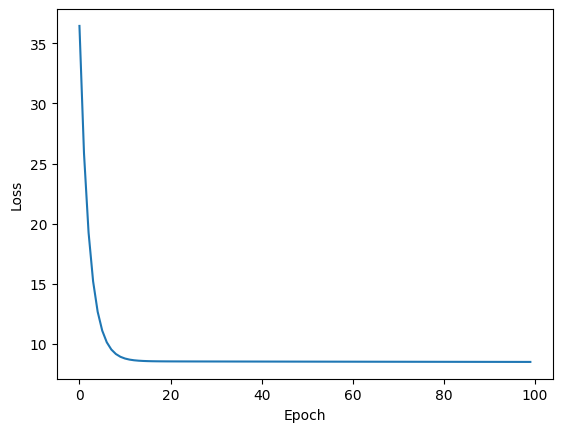

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

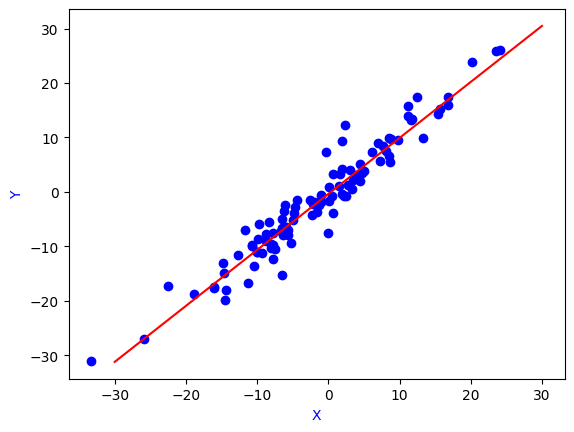

In [32]:
[w, b] = model1.parameters()
plot_fit(w, b, x, y)